# Name :Banoth Akhil
## Admission Number :22je0233
## Department  :Petroleum Engineering

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculating Reservoir-Permeability using Data : Well Test Analysis

> NumPy | Plotting | Domain Concepts | Reservoir-Engineering

### Pwf = Pi - m[log(t) + C] 

In [101]:
df = pd.read_csv('akhil_banoth_petroleum_dataset.csv')

In [102]:
df

,time,pressure
0,0.0010,2743.96
1,0.0021,2737.52
2,0.0034,2730.16
3,0.0048,2722.32
4,0.0064,2713.83
...,...,...
76,54.7900,2267.69
77,60.7900,2265.73
78,66.7900,2264.46
79,72.0000,2262.99


### A. Cartesian Analysis

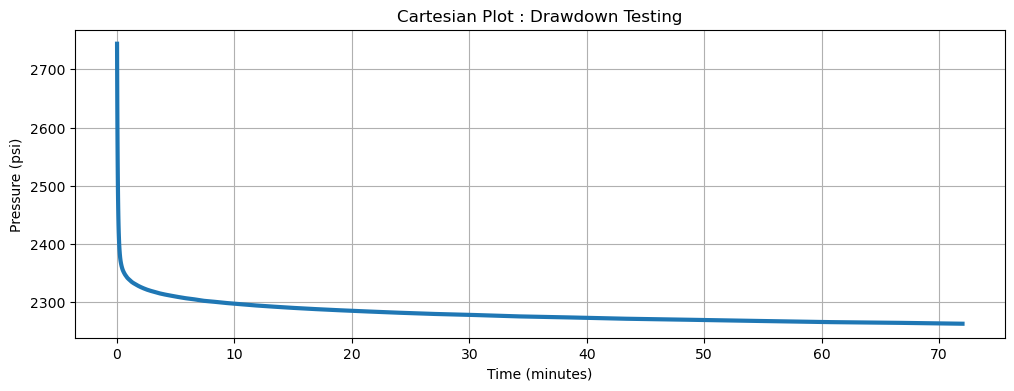

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# make sure numeric
df['time'] = pd.to_numeric(df['time'], errors='coerce')
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')
df = df.dropna(subset=['time','pressure'])

plt.style.use('default')
plt.figure(figsize=(12,4))

plt.plot(df['time'], df['pressure'], lw=3)

plt.xlabel('Time (minutes)')
plt.ylabel('Pressure (psi)')
plt.title('Cartesian Plot : Drawdown Testing')
plt.grid(True)
plt.show()


### B. Semilog Analysis : High level searching for MTR.

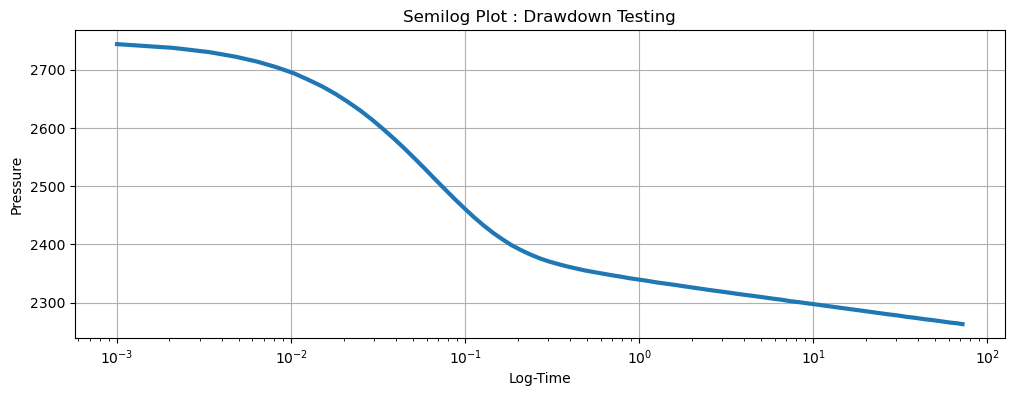

In [104]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.semilogx(df['time'], df['pressure'],lw=3)

plt.xlabel('Log-Time') ; plt.ylabel('Pressure')

plt.title('Semilog Plot : Drawdown Testing')
plt.grid()

In [105]:

Pi = 2760  # psi Given

# Ensure df is a proper copy
df = df.copy()

# ΔP = |Pi - Pwf|
df['delP'] = (Pi - df['pressure']).abs()

# d(ΔP)
df['d(delP)'] = df['delP'].diff().abs().fillna(0)

# dt
df['dt'] = df['time'].diff().fillna(0)

# P' = t * d(ΔP)/dt
df['Pdash'] = 0
df.loc[1:, 'Pdash'] = df.loc[1:, 'time'] * df.loc[1:, 'd(delP)'] / df.loc[1:, 'dt']

df.head()


,time,pressure,delP,d(delP),dt,Pdash
0,0.0010,2743.96,16.04,0.00,0.0000,0.000000
1,0.0021,2737.52,22.48,6.44,0.0011,12.294545
2,0.0034,2730.16,29.84,7.36,0.0013,19.249231
3,0.0048,2722.32,37.68,7.84,0.0014,26.880000
4,0.0064,2713.83,46.17,8.49,0.0016,33.960000


### C. Log-Log Plot : Computations.

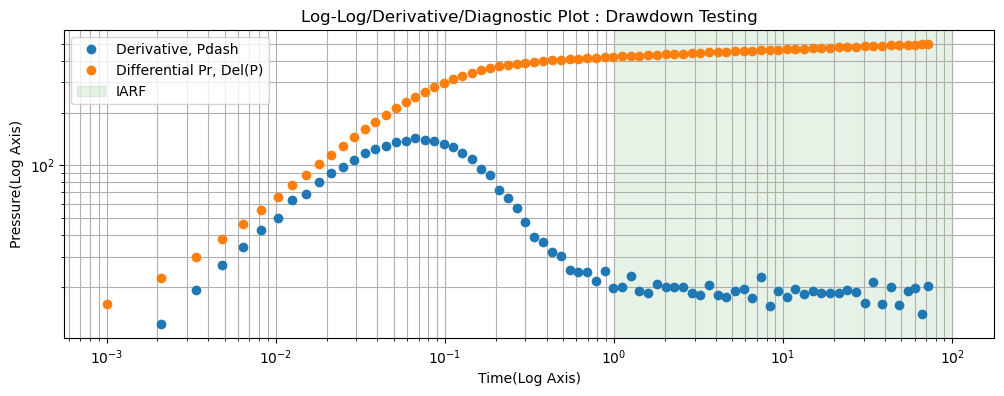

In [106]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.loglog(df['time'], df['Pdash'],'o',label='Derivative, Pdash')
plt.loglog(df['time'], df['delP'],'o',label='Differential Pr, Del(P)')

plt.axvspan(1,100,color='green',alpha=0.1,label='IARF')

plt.xlabel('Time(Log Axis)') ; plt.ylabel('Pressure(Log Axis)')

plt.title('Log-Log/Derivative/Diagnostic Plot : Drawdown Testing')


plt.legend()
plt.grid(True, which="both")

In [107]:
df[df['time']>1]['pressure'].mean()

2298.7667567567564

In [108]:
tmin_iarf = 1 #hr
tmax_iarf = 50 #hrs

In [109]:
# plt.style.use('default')
# plt.figure(figsize=(12,4))

# plt.scatter(np.log(df['time']), np.log(df['Pdash']),lw=3)
# plt.scatter(np.log(df['time']), np.log(df['delP']),lw=3)

# plt.xlabel('Log-Time') ; plt.ylabel('Log-Pressure')

# plt.title('Log-Log Plot : Drawdown Testing')


# plt.grid()

### D. Semi-Log Plot for IARF MTR only

In [110]:
df_semilog = df[(df['time']>=tmin_iarf) & (df['time'] <= tmax_iarf)]

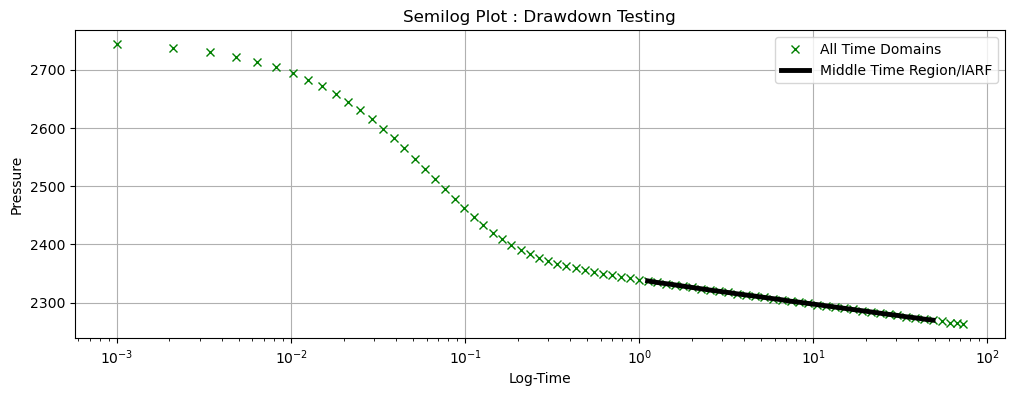

In [111]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.semilogx(df['time'], df['pressure'],'x',color='green',label='All Time Domains')
plt.semilogx(df_semilog['time'], df_semilog['pressure'],color='black',lw=3.5,label='Middle Time Region/IARF')

plt.xlabel('Log-Time') ; plt.ylabel('Pressure')

plt.title('Semilog Plot : Drawdown Testing')

plt.legend()
plt.grid()

## CONCLUSION : Finding Permeability.

<AxesSubplot:xlabel='time', ylabel='pressure'>

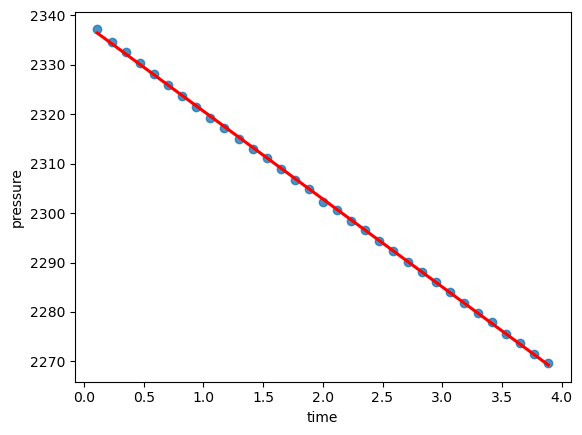

In [112]:
import seaborn as sns

t = np.log(df_semilog['time'])
P = df_semilog['pressure']

sns.regplot(x=t, y=P, ci=None, line_kws={"color": "red"})


In [113]:
#Polyfit
np.polyfit(t,P,1)

array([ -17.7869321 , 2338.42912687])

In [114]:
[slope,intercept]=np.polyfit(t,P,1)

In [115]:
abs(slope)

17.786932104989514

In [116]:
m = abs(slope)

## $ m = 162.6 \frac {q \mu B} {k h} $

In [117]:
q = 125 #stb/d
mu = 2.1 #cp
B = 1.14 #rb/Stb
h = 50 #ft

k = 162.6*q*mu/m/h

print(f'Formation Permeability is : {np.round(k,2)} miliDarcies')

Formation Permeability is : 47.99 miliDarcies


And that's how you calculate Permeability using a Well Test.

# 2. Forecasting with Data : DCA

In [118]:
dca_df = pd.read_csv('akhil_banoth_oil_dataset.csv',
                     index_col = 0 , parse_dates = True)

dca_df.head()

,Rate_(SCF/d)
Date,
2004-04-01,2706039.0
2004-05-01,2492086.2
2004-06-02,1816846.1
2004-07-02,1920207.4
2004-07-04,1683521.4


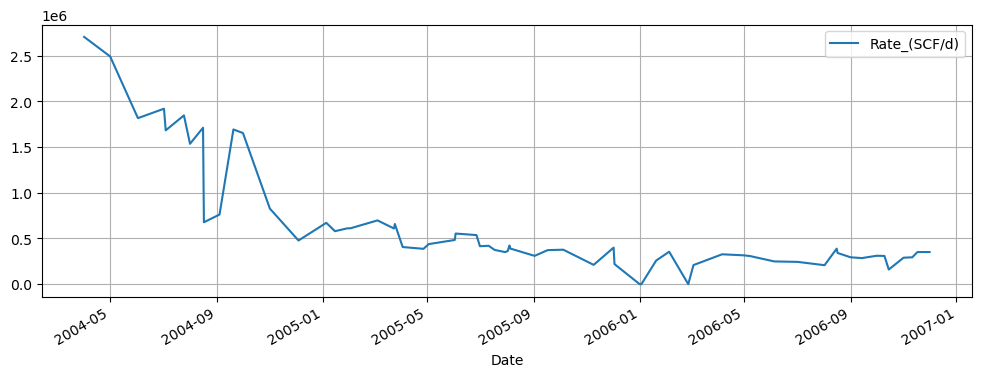

In [119]:
dca_df.plot(figsize=(12,4))
plt.grid()

In [120]:
print(dca_df.columns.tolist())


['Rate_(SCF/d)']


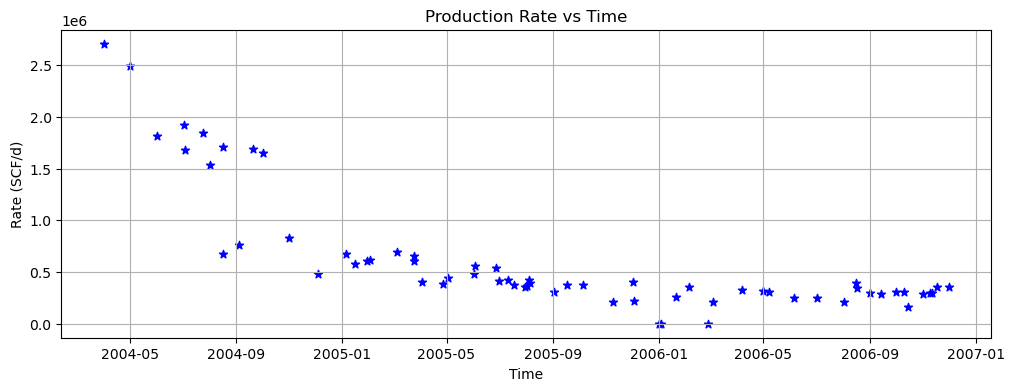

In [121]:
plt.figure(figsize=(12,4))
plt.scatter(x=dca_df.index, y=dca_df['Rate_(SCF/d)'], marker='*', color='blue')
plt.xlabel("Time")
plt.ylabel("Rate (SCF/d)")
plt.title("Production Rate vs Time")
plt.grid()
plt.show()


In [122]:
def day_maker(df):
    
    '''
    Pass a Time-Series DataFrame to it and it will
    return a days column. Subtracts dates and makes days. 
    
    Returned is a days (np array).
    '''
    
    days = []

    for d in range(len(df)):
    
        delta = df.index[d] - df.index[0]
    
        days.append(delta.days)
    
    days = np.array(days)
    
    return days

In [123]:
dca_df['days'] = day_maker(dca_df)

In [124]:
dca_df.head()

,Rate_(SCF/d),days
Date,,
2004-04-01,2706039.0,0
2004-05-01,2492086.2,30
2004-06-02,1816846.1,62
2004-07-02,1920207.4,92
2004-07-04,1683521.4,94


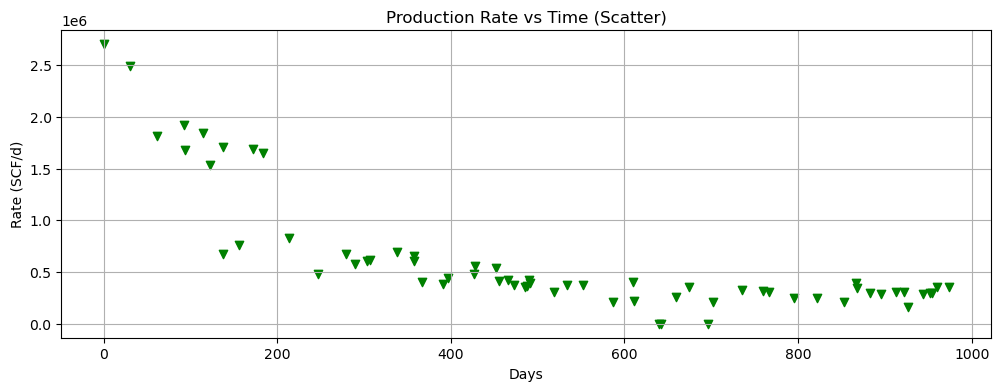

In [125]:
plt.figure(figsize=(12,4))
plt.scatter(
    x=dca_df['days'], 
    y=dca_df['Rate_(SCF/d)'], 
    marker='v', 
    color='green'
)

plt.xlabel('Days')
plt.ylabel('Rate (SCF/d)')
plt.title('Production Rate vs Time (Scatter)')
plt.grid()
plt.show()


In [126]:
from scipy.optimize import curve_fit

In [127]:
def q_hyp(t,qi,b,d):
    
    qfit = qi/(np.abs((1 + b * d* t))**(1/b))
    
    return qfit


def hyp_fitter(q,t):
        
    #First we have to Normalize so that it converges well and quick.
    q_n = q/max(q)
    t_n = t/max(t)
    
    #curve-fit (optimization of parameters)
    params = curve_fit(q_hyp,t_n,q_n)
    [qi,b,d] = params[0]
    
    #These are for normalized t and q. 
    #We must re-adjust for q and t (non-normalized)
    d_f = d/max(t)
    qi_f = qi*max(q)
    
    #Now we can use these parameters. 
    q_hyp_fit = q_hyp(t,qi_f,b,d_f)
    
    return q_hyp_fit,params

In [128]:
print(dca_df.columns.tolist())


['Rate_(SCF/d)', 'days']


In [129]:
q = dca_df['Rate_(SCF/d)']  # corrected column name
t = dca_df['days']

q_fit, params = hyp_fitter(q, t)


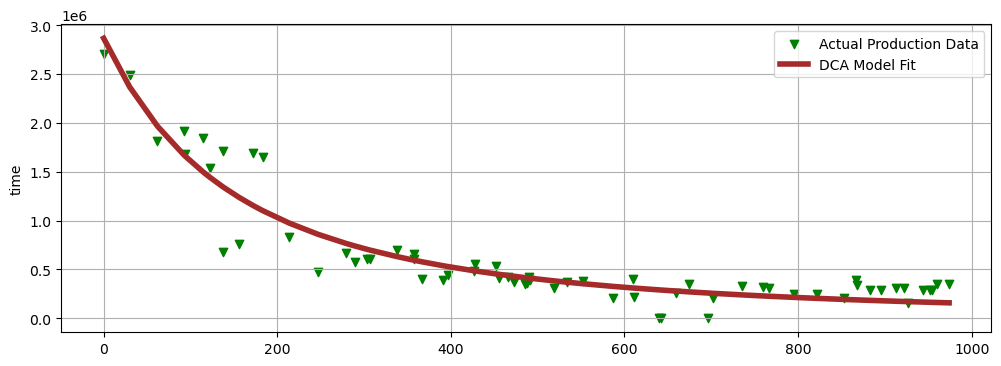

In [130]:
plt.figure(figsize=(12,4))
plt.scatter(t,q,marker='v',color='green',label='Actual Production Data')
plt.plot(t,q_fit,color='brown',lw=4,label='DCA Model Fit')

plt.ylabel(df.columns[0])

plt.grid()
plt.legend()